In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# evaluate

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

## Load predictions

In [34]:
stamp = '1726769849_mlp_vr-90hz-delta-h16-16_s18'

users, X, Y, Y_hat = (np.load(os.path.join('output', stamp, f'test_{suffix}.npy'), allow_pickle=True)
                      for suffix in ['users', 'input', 'head_actual', 'head_predicted'])
print(users)
print('X:', X.shape)
print('Y:', Y.shape)
print('Y_hat:', Y_hat.shape)

['User5' 'User2' 'User10' 'User4' 'User20']
X: (485469, 27)
Y: (485469, 3)
Y_hat: (485469, 3)


In [35]:
if len(X.shape) == 3:  # LSTM
    sequence_Y = Y[:, 0]
    sequence_Y_hat = Y_hat[:, 0]
else:
    sequence_Y = Y
    sequence_Y_hat = Y_hat

sequence_Y[:10]

array([[-4.6404e-04,  3.6500e-05,  9.8000e-06],
       [-4.6345e-04,  2.8520e-04, -9.2300e-05],
       [-4.2984e-04,  5.2210e-04, -1.9120e-04],
       [-2.7720e-04,  3.6500e-04, -1.3520e-04],
       [-5.7643e-04,  7.8210e-04, -2.9140e-04],
       [-1.3548e-04,  8.3520e-04, -3.3680e-04],
       [-4.7950e-04,  9.9570e-04, -3.8650e-04],
       [ 3.8220e-05,  1.2474e-03, -5.1830e-04],
       [-2.4175e-04,  1.1252e-03, -4.5540e-04],
       [-1.7040e-05,  1.1089e-03, -4.6140e-04]], dtype=float32)

In [36]:
sequence_Y_hat[:10]

array([[-6.7620724e-04,  1.3872609e-04, -2.5108457e-05],
       [-3.9176270e-04,  4.7605857e-04, -1.3176352e-04],
       [-2.4794787e-04,  9.2489645e-04, -3.7188269e-04],
       [-3.4414604e-04,  1.1071227e-03, -4.2113476e-04],
       [-1.5209615e-04,  8.6388364e-04, -3.3339299e-04],
       [-4.6242401e-04,  1.2421981e-03, -4.4796243e-04],
       [-1.3351440e-04,  1.4539510e-03, -5.8598816e-04],
       [-2.3414195e-04,  1.4858209e-03, -5.7706609e-04],
       [ 3.1281263e-05,  1.8024519e-03, -7.2430260e-04],
       [ 4.3328851e-05,  1.6265400e-03, -6.6999160e-04]], dtype=float32)

## Plot trajectories

In [37]:
rng = np.random.default_rng(seed=1)
steps_max = 2 ** 11
# offset = 10801 * 11

In [40]:
def plot_actual_predicted(X, Y, Y_hat):
    fig, axes = plt.subplots(9, 1, figsize=(12, 24))
    if len(Y.shape) == 3:  # LSTM
        sequence_index = rng.integers(X.shape[1])
        X_sample = X[:, sequence_index]
        Y_sample = Y[:, sequence_index]
        Y_hat_sample = Y_hat[:, sequence_index]
        print(f'X[:, sequence_index={sequence_index}]')
        print(f'Y[:, sequence_index={sequence_index}]')
        print(f'Y_hat[:, sequence_index={sequence_index}]')
    else:
        offset = rng.integers(Y.shape[0] - steps_max)
        X_sample = X[offset:offset + steps_max]
        Y_sample = Y[offset:offset + steps_max]
        Y_hat_sample = Y_hat[offset:offset + steps_max]
        print(f'X[{offset}:{offset + steps_max}]')
        print(f'Y[{offset}:{offset + steps_max}]')
        print(f'Y_hat[{offset}:{offset + steps_max}]')

    ax_names = ['X', 'Y', 'Z']
    for i in range(6):
        axes[i].plot(X_sample[:, i])
        side = 'L' if i < 3 else 'R'
        axes[i].set_title(f'Eye {side} - {ax_names[i % 3]}')
    for i in range(3):
        y = Y_sample[:, i]
        y_hat = Y_hat_sample[:, i]
        axes[6 + i].plot(y, label='Actual')
        axes[6 + i].plot(y_hat, label='Predicted')
        axes[6 + i].set_title(f'Neck Prediction - {ax_names[i % 3]}')
        axes[6 + i].legend()
    plt.tight_layout()
    plt.show()

X[247425:249473]
Y[247425:249473]
Y_hat[247425:249473]


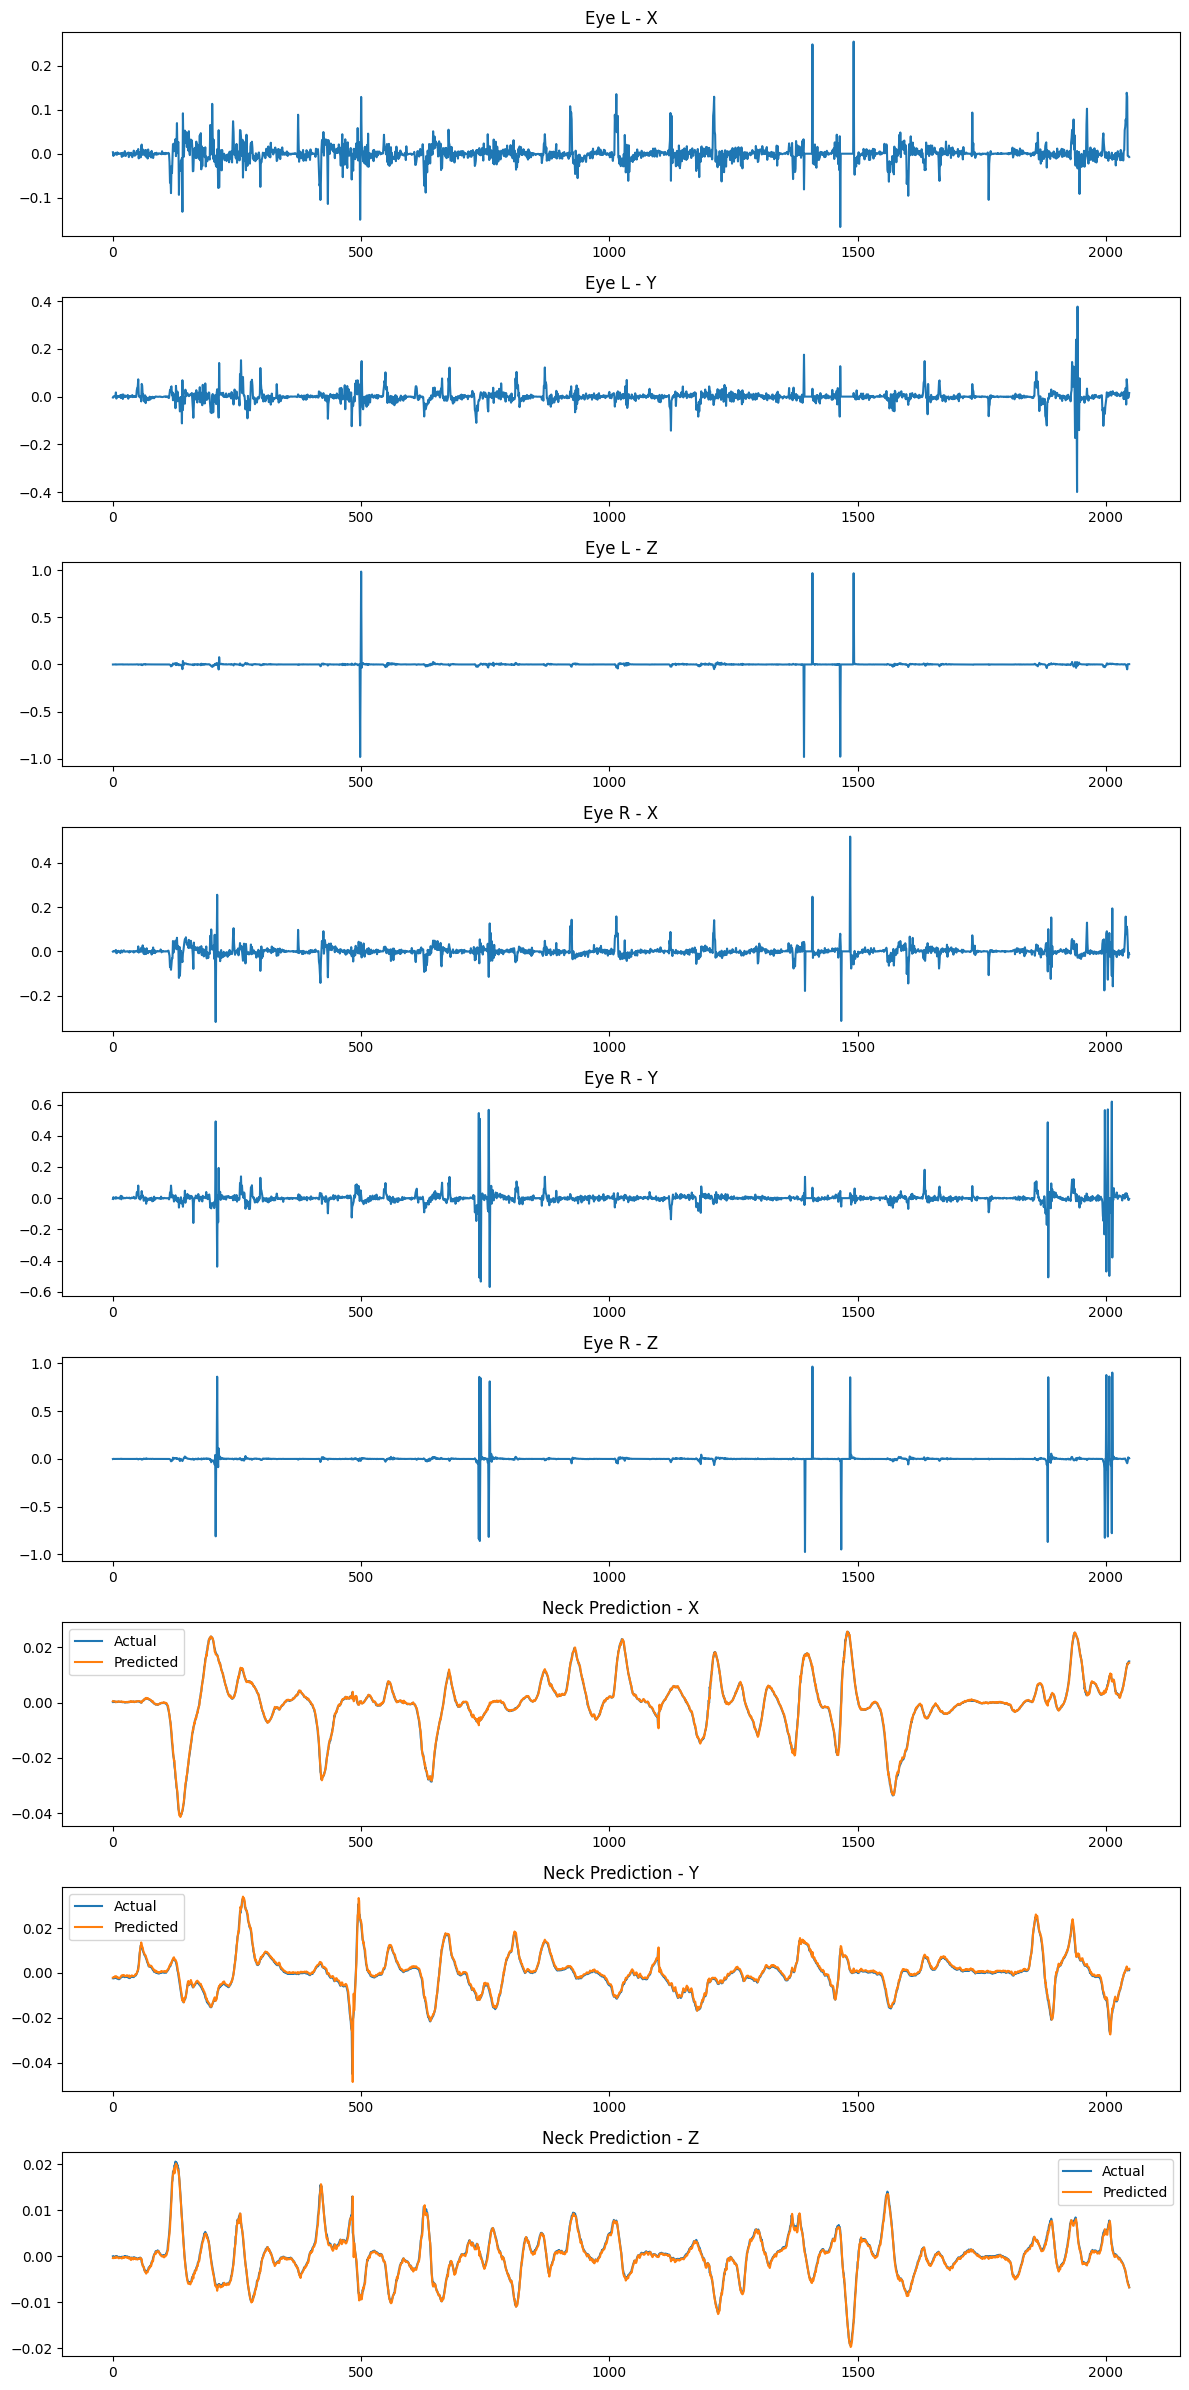

In [41]:
plot_actual_predicted(X, Y, Y_hat)